In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd

In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
%matplotlib inline

In [61]:
churn_data = pd.read_csv('C:\\Users\\admin\\Downloads\\archive (1)\\churn_data.csv')

churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
customer_data = pd.read_csv("C:\\Users\\admin\\Downloads\\archive (1)\\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [63]:
internet_data = pd.read_csv("C:\\Users\\admin\\Downloads\\archive (1)\\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [64]:
df = pd.merge(churn_data, customer_data, how='inner', on='customerID')


In [65]:
telecom = pd.merge(df, internet_data, how='inner', on='customerID')

In [66]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [67]:
telecom.shape

(7042, 21)

In [68]:
telecom.describe()



,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [69]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [70]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [71]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [72]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [73]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [74]:
telecom['TotalCharges'].describe()

count    7031.000000
mean     2282.651714
std      2266.279660
min        18.800000
25%       401.400000
50%      1397.300000
75%      3793.050000
max      8684.800000
Name: TotalCharges, dtype: float64

In [75]:
telecom.Churn.describe() 

count     7042
unique       2
top         No
freq      5173
Name: Churn, dtype: object

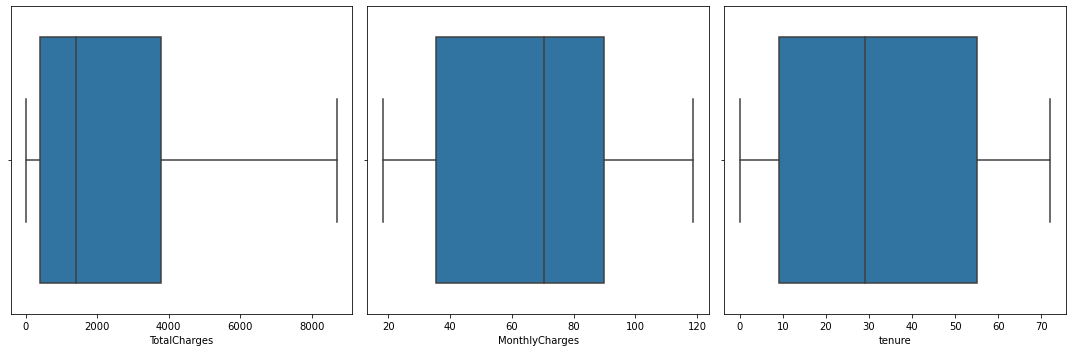

In [76]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(data = telecom, x = 'TotalCharges',  hue = 'Churn', ax = axs[0])

sns.boxplot(data = telecom, x = 'MonthlyCharges',  hue = 'Churn', ax = axs[1] )

sns.boxplot(data = telecom, x = 'tenure',  hue = 'Churn', ax = axs[2] )
plt.tight_layout()

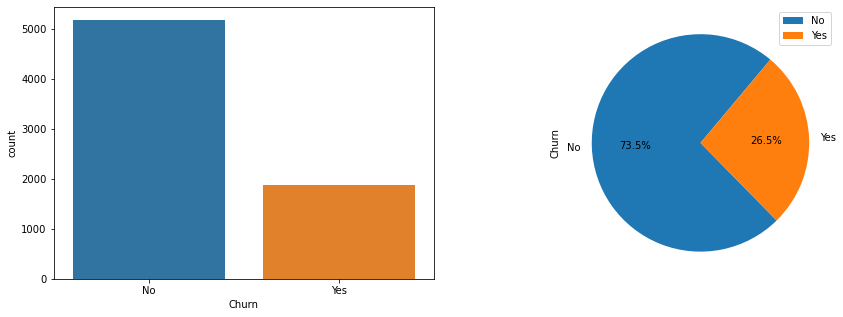

In [77]:
# no outliers
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(telecom['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(telecom['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()


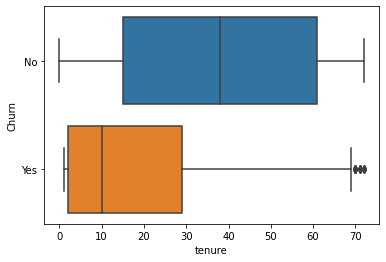

In [78]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

In [79]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [80]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents','StreamingTV','StreamingMovies']

In [81]:
telecom[varlist] = telecom[varlist].apply(binary_map)


In [82]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

In [83]:
telecom = pd.concat([telecom, dummy1], axis=1)

In [84]:
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

In [85]:
telecom = telecom.drop(['customerID','Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [86]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [87]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7031 non-null   int64  
 1   PhoneService                           7031 non-null   int64  
 2   PaperlessBilling                       7031 non-null   int64  
 3   MonthlyCharges                         7031 non-null   float64
 4   TotalCharges                           7031 non-null   float64
 5   Churn                                  7031 non-null   int64  
 6   SeniorCitizen                          7031 non-null   int64  
 7   Partner                                7031 non-null   int64  
 8   Dependents                             7031 non-null   int64  
 9   Contract_One year                      7031 non-null   uint8  
 10  Contract_Two year                      7031 non-null   uint8  
 11  Paym

Train test

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = telecom.drop(['Churn'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [90]:
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [343]:
cols = list(X_train.columns)
X_train[cols] = scaler.fit_transform(df_train[cols])

NameError: name 'df_train' is not defined

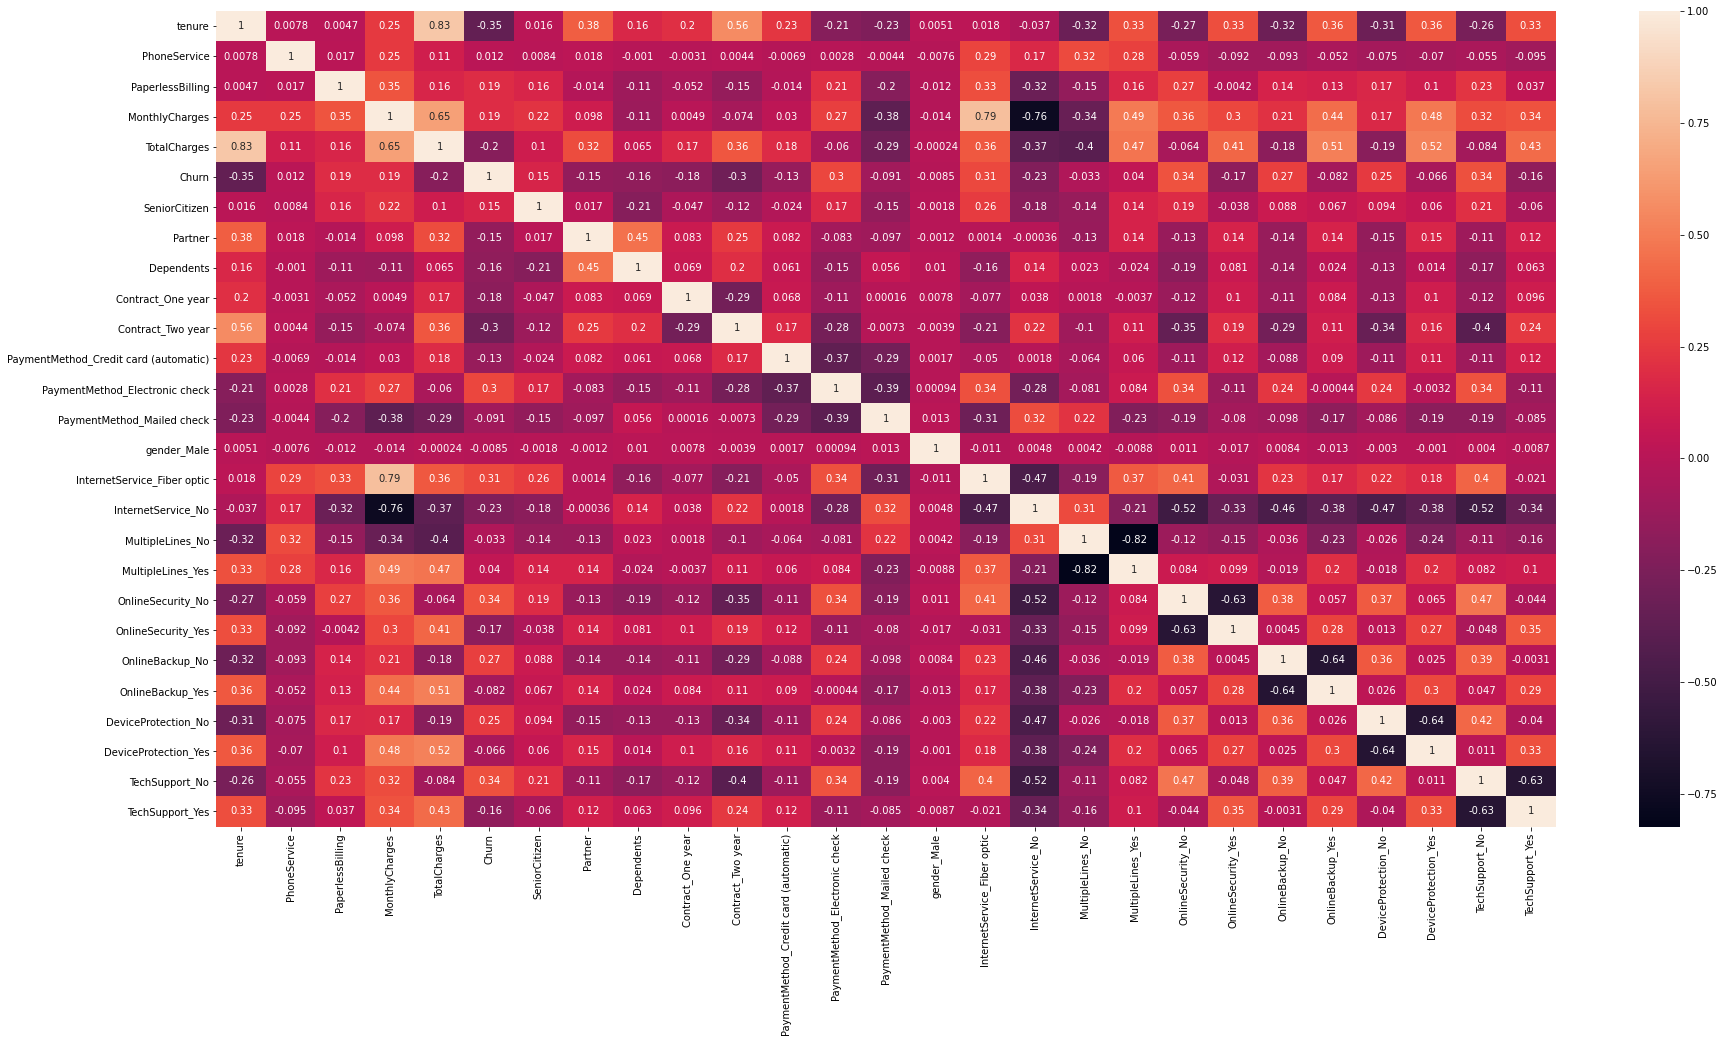

In [344]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [345]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No'
                       ], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No'
                         ], 1)

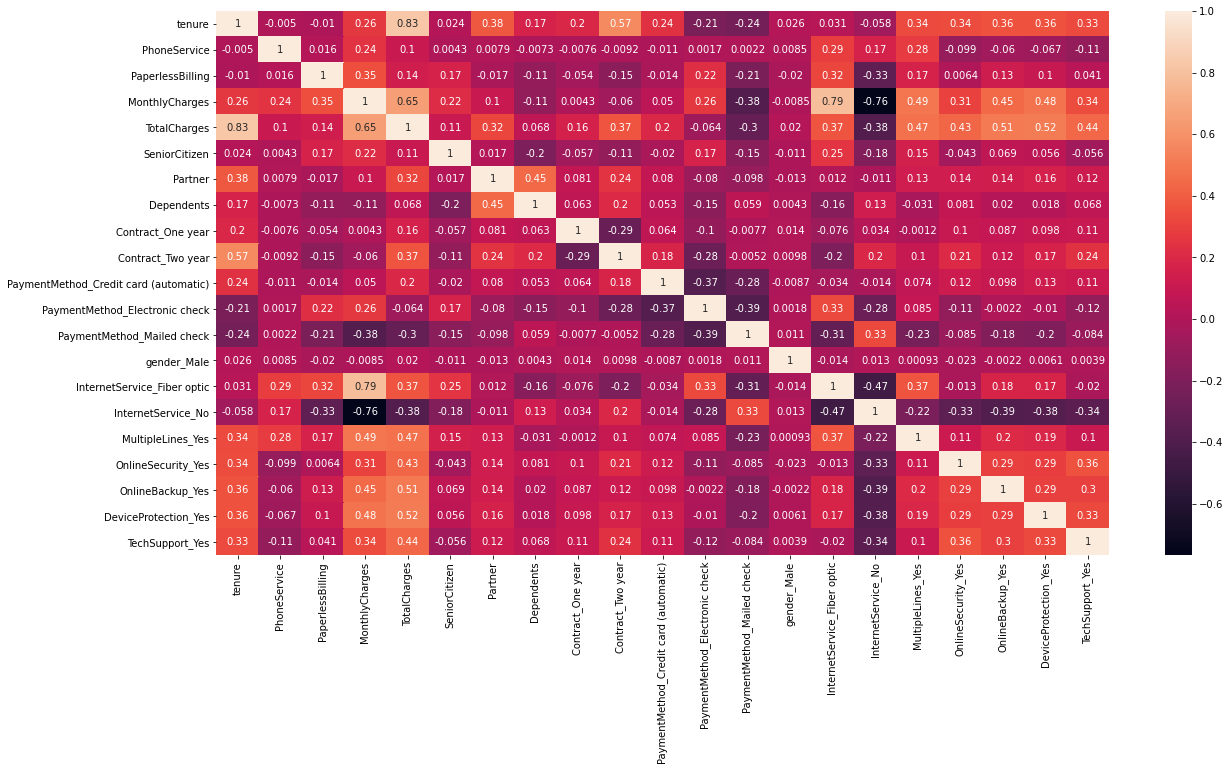

In [346]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()


Logistic regression

In [347]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [348]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [349]:
rfe.support_

array([False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True])

In [350]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('tenure', False, 2),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 5),
 ('TotalCharges', False, 7),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 4),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 3),
 ('gender_Male', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1)]

In [351]:
import statsmodels.api as sm

In [352]:
col = X_train.columns[rfe.support_]

In [353]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2116.3
Date:                Wed, 14 Jul 2021   Deviance:                       4232.7
Time:                        13:59:22   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4318      0.156     -2.772      0.006      -0.737      -0.126
PhoneService                             -0.2322      0.150     -1.550      0.121      -0.526       0.061
PaperlessBilling                          0.3085      0.087      3.547      0.000       0.138       0.479
SeniorCitizen                             0.2400      0.096      2.487      0.013       0.051       0.429
Dependents                               -0.2685      0.096     -2.795      0.005      -0.457      -0.080
Contract_One year                        -1.2570      0.117    -10.749      0.000      -1.486      -1.028
Contract_Two year                        -2.3214      0.195    -11.933      0.000      -2.703      -1.940
PaymentMethod_Credit card (automatic)    -0.1757      0.117     -1.507      0.132      -0.404       0.053
PaymentMethod_Electronic check            0.3433      0.089      3.869      0.000       0.169       0.517
gender_Male                              -0.0871      0.076     -1.149      0.251      -0.236       0.062
InternetService_Fiber optic               0.7374      0.103      7.142      0.000       0.535       0.940
InternetService_No                       -1.1171      0.159     -7.018      0.000      -1.429      -0.805
MultipleLines_Yes                         0.0121      0.087      0.139      0.889      -0.159       0.183
OnlineSecurity_Yes                       -0.5288      0.098     -5.387      0.000      -0.721      -0.336
OnlineBackup_Yes                         -0.3964      0.086     -4.608      0.000      -0.565      -0.228
TechSupport_Yes                          -0.3905      0.098     -3.975      0.000      -0.583      -0.198
=========================================================================================================
"""

In [354]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.304286
5789    0.013680
5008    0.013680
880     0.336773
2784    0.431150
3873    0.019059
5386    0.350165
6622    0.323225
4464    0.367606
5278    0.311350
dtype: float64

In [355]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30428565, 0.01367986, 0.01367986, 0.33677332, 0.43115037,
       0.01905935, 0.35016512, 0.32322525, 0.36760557, 0.31135042])

In [356]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()


,Churn,Churn_Prob,CustID
0,0,0.304286,879
1,0,0.013680,5789
2,0,0.013680,5008
3,1,0.336773,880
4,1,0.431150,2784


In [357]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.304286,879,0
1,0,0.013680,5789,0
2,0,0.013680,5008,0
3,1,0.336773,880,0
4,1,0.431150,2784,0


In [358]:
from sklearn import metrics

In [359]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3223  399]
 [ 634  665]]


In [360]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7900833163991059


In [361]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,PhoneService,8.10
9,InternetService_Fiber optic,3.36
10,InternetService_No,2.89
1,PaperlessBilling,2.68
11,MultipleLines_Yes,2.26
5,Contract_Two year,2.17
7,PaymentMethod_Electronic check,2.00
14,TechSupport_Yes,1.99
13,OnlineBackup_Yes,1.98
8,gender_Male,1.91


In [363]:
col = col.drop('PhoneService', 1)
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [364]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2117.5
Date:                Wed, 14 Jul 2021   Deviance:                       4235.1
Time:                        13:59:22   Pearson chi2:                 4.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5948      0.116     -5.136      0.000      -0.822      -0.368
PaperlessBilling                          0.3127      0.087      3.599      0.000       0.142       0.483
SeniorCitizen                             0.2509      0.096      2.608      0.009       0.062       0.439
Dependents                               -0.2710      0.096     -2.821      0.005      -0.459      -0.083
Contract_One year                        -1.2545      0.117    -10.733      0.000      -1.484      -1.025
Contract_Two year                        -2.3127      0.194    -11.895      0.000      -2.694      -1.932
PaymentMethod_Credit card (automatic)    -0.1694      0.116     -1.455      0.146      -0.398       0.059
PaymentMethod_Electronic check            0.3519      0.089      3.976      0.000       0.178       0.525
gender_Male                              -0.0885      0.076     -1.166      0.243      -0.237       0.060
InternetService_Fiber optic               0.6703      0.093      7.206      0.000       0.488       0.853
InternetService_No                       -1.1869      0.152     -7.796      0.000      -1.485      -0.888
MultipleLines_Yes                        -0.0120      0.086     -0.140      0.889      -0.180       0.156
OnlineSecurity_Yes                       -0.5325      0.098     -5.430      0.000      -0.725      -0.340
OnlineBackup_Yes                         -0.3908      0.086     -4.548      0.000      -0.559      -0.222
TechSupport_Yes                          -0.3953      0.098     -4.029      0.000      -0.588      -0.203
=========================================================================================================
"""

In [365]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [366]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [367]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.315749,879,0
1,0,0.013873,5789,0
2,0,0.013873,5008,0
3,1,0.339173,880,0
4,1,0.430927,2784,0


In [368]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.786628733997155


In [369]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,InternetService_Fiber optic,2.66
0,PaperlessBilling,2.52
4,Contract_Two year,2.17
10,MultipleLines_Yes,2.15
12,OnlineBackup_Yes,1.96
6,PaymentMethod_Electronic check,1.92
13,TechSupport_Yes,1.92
11,OnlineSecurity_Yes,1.82
7,gender_Male,1.81
9,InternetService_No,1.79


In [370]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3215,  407],
       [ 643,  656]], dtype=int64)

In [371]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.786628733997155

In [372]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [373]:
TP / float(TP+FN)#sensitivity


0.5050038491147036

In [374]:
TN / float(TN+FP)#specificity

0.8876311430149089

In [375]:
FP/ float(TN+FP)#false postive rate

0.11236885698509111

In [376]:
TP / float(TP+FP)#positive predictive value 

0.6171213546566322

In [377]:
TN / float(TN+ FN)#Negative predictive value

0.8333333333333334

ROC

In [378]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [379]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

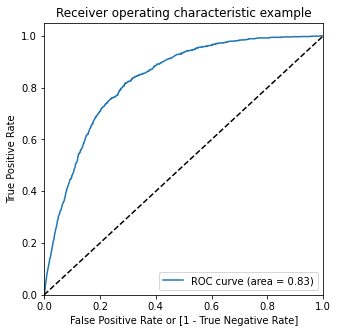

In [380]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)


Cutt off

In [381]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.315749,879,0,1,1,1,1,0,0,0,0,0,0
1,0,0.013873,5789,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013873,5008,0,1,0,0,0,0,0,0,0,0,0
3,1,0.339173,880,0,1,1,1,1,0,0,0,0,0,0
4,1,0.430927,2784,0,1,1,1,1,1,0,0,0,0,0


In [382]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263971  1.000000  0.000000
0.1   0.1  0.593172  0.946882  0.466317
0.2   0.2  0.706360  0.850654  0.654611
0.3   0.3  0.746190  0.776751  0.735229
0.4   0.4  0.780329  0.689761  0.812811
0.5   0.5  0.786629  0.505004  0.887631
0.6   0.6  0.775859  0.287914  0.950856
0.7   0.7  0.750254  0.081601  0.990061
0.8   0.8  0.736029  0.000000  1.000000
0.9   0.9  0.736029  0.000000  1.000000


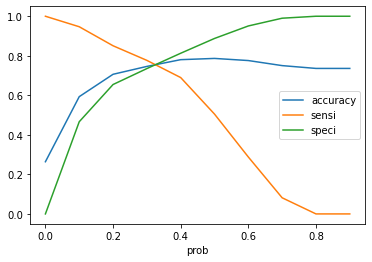

In [383]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [384]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.315749,879,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.013873,5789,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013873,5008,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.339173,880,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.430927,2784,0,1,1,1,1,1,0,0,0,0,0,1


In [385]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7685429790692948

In [386]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2824,  798],
       [ 341,  958]], dtype=int64)

In [387]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [388]:
TP / float(TP+FN)#sensitivity

0.737490377213241

In [389]:
TN / float(TN+FP)#specificity

0.7796797349530646

In [390]:
FP/ float(TN+FP)#false postive rate

0.2203202650469354

In [391]:
TP / float(TP+FP)#positive predictive value 

0.5455580865603644

In [392]:
TN / float(TN+ FN)#Negative predictive value

0.892259083728278

Precision and Recall

In [393]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3215,  407],
       [ 643,  656]], dtype=int64)

In [394]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6171213546566322

In [395]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5050038491147036

In [396]:
from sklearn.metrics import precision_score, recall_score

In [397]:
?precision_score

In [398]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6171213546566322

In [399]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5050038491147036

In [400]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 4916    0
 4917    0
 4918    0
 4919    0
 4920    0
 Name: Churn, Length: 4921, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4916    0
 4917    0
 4918    0
 4919    0
 4920    0
 Name: predicted, Length: 4921, dtype: int64)

In [401]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

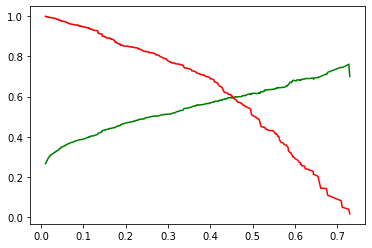

In [402]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [403]:
X_test = X_test[col]
X_test.head()

,PaperlessBilling,SeniorCitizen,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,1,0,0,0,0,1,0,1,1,0,0,0,0,0
3729,1,0,0,0,1,1,0,1,0,1,0,0,0,0
1761,1,0,0,0,1,1,0,1,0,1,1,0,0,0
2283,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1872,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [404]:
X_test_sm = sm.add_constant(X_test)

In [405]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

942     0.532526
3729    0.017300
1761    0.017098
2283    0.574373
1872    0.012550
1970    0.677012
2532    0.266840
1616    0.015656
2485    0.674386
4783    0.079227
dtype: float64

In [406]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [407]:
y_pred_1.head()

,0
942,0.532526
3729,0.017300
1761,0.017098
2283,0.574373
1872,0.012550


In [408]:
y_test_df = pd.DataFrame(y_test)

In [409]:
y_test_df['CustID'] = y_test_df.index

In [410]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [411]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [412]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.532526
1,0,3729,0.017300
2,0,1761,0.017098
3,1,2283,0.574373
4,0,1872,0.012550


In [413]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [414]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [415]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.532526,1
1,0,3729,0.017300,0
2,0,1761,0.017098,0
3,1,2283,0.574373,1
4,0,1872,0.012550,0


In [416]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.771563981042654

In [417]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1263,  277],
       [ 205,  365]], dtype=int64)

In [418]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [419]:
TP / float(TP+FN) #sensitivity 

0.6403508771929824

In [420]:
TN / float(TN+FP)#specificity

0.8201298701298702

Results
roc =0.83
sensitivity =0.6403508771929824
specificity=0.8201298701298702
Precision=0.6171213546566322
Recall=0.5050038491147036

TREE

In [438]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [439]:
X_test.columns

Index(['PaperlessBilling', 'SeniorCitizen', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [440]:
X_train.columns

Index(['PaperlessBilling', 'SeniorCitizen', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [441]:
X_train=X_train.drop(['tenure','PhoneService','MonthlyCharges','TotalCharges','Partner','PaymentMethod_Mailed check','DeviceProtection_Yes'],1)

KeyError: "['tenure' 'PhoneService' 'MonthlyCharges' 'TotalCharges' 'Partner'\n 'PaymentMethod_Mailed check' 'DeviceProtection_Yes'] not found in axis"

In [442]:
train_gini_predictions = clf_gini.predict(X_train)
test_gini_predictions = clf_gini.predict(X_test)

In [443]:
from sklearn.metrics import accuracy_score

In [444]:
print('Training Accuracy: ' ,accuracy_score(y_train, train_gini_predictions))
print('Testing Accuracy: ' ,accuracy_score(y_test, test_gini_predictions))

Training Accuracy:  0.7654948181263971
Testing Accuracy:  0.7540284360189573


[Text(418.5, 713.475, 'X[8] <= 0.5\ngini = 0.389\nsamples = 4921\nvalue = [3622, 1299]'),
 Text(209.25, 509.625, 'X[4] <= 0.5\ngini = 0.247\nsamples = 2759\nvalue = [2360, 399]'),
 Text(104.625, 305.775, 'X[3] <= 0.5\ngini = 0.325\nsamples = 1888\nvalue = [1502, 386]'),
 Text(52.3125, 101.92499999999995, 'gini = 0.399\nsamples = 1244\nvalue = [901, 343]'),
 Text(156.9375, 101.92499999999995, 'gini = 0.125\nsamples = 644\nvalue = [601, 43]'),
 Text(313.875, 305.775, 'X[6] <= 0.5\ngini = 0.029\nsamples = 871\nvalue = [858, 13]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.024\nsamples = 824\nvalue = [814, 10]'),
 Text(366.1875, 101.92499999999995, 'gini = 0.12\nsamples = 47\nvalue = [44, 3]'),
 Text(627.75, 509.625, 'X[4] <= 0.5\ngini = 0.486\nsamples = 2162\nvalue = [1262, 900]'),
 Text(523.125, 305.775, 'X[3] <= 0.5\ngini = 0.499\nsamples = 1854\nvalue = [973, 881]'),
 Text(470.8125, 101.92499999999995, 'gini = 0.495\nsamples = 1483\nvalue = [669, 814]'),
 Text(575.4375, 101.9249999

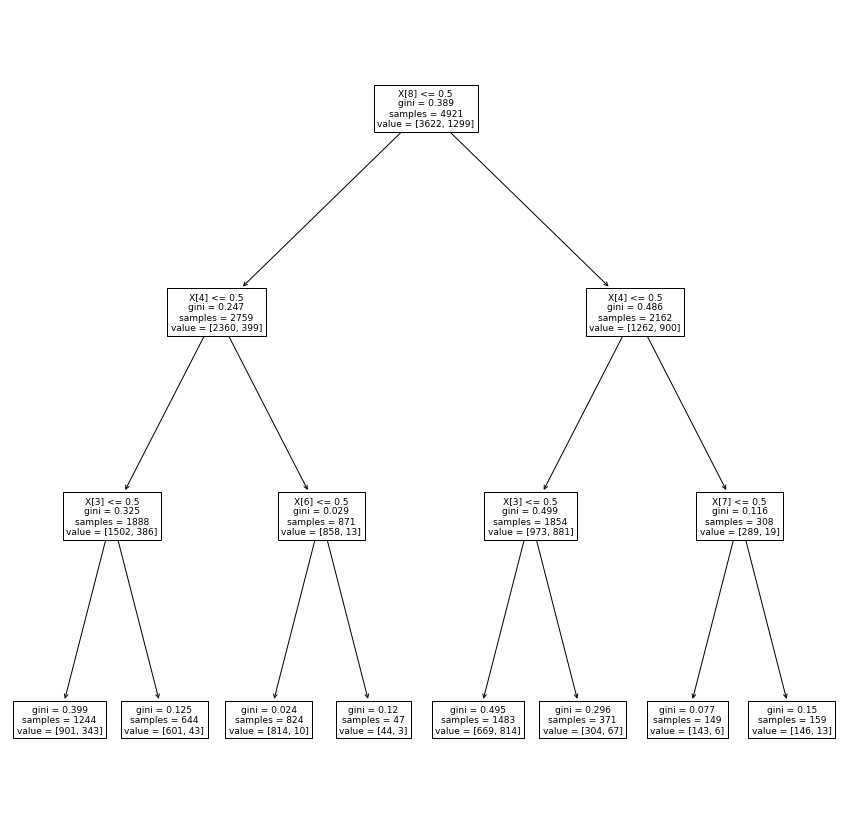

In [445]:
plt.figure(figsize=(15,15))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

<AxesSubplot:>

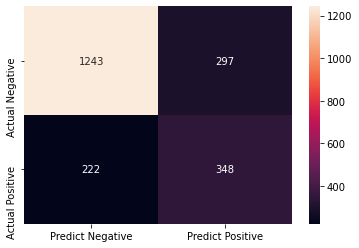

In [446]:
cm = confusion_matrix(y_test, test_gini_predictions)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [447]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [448]:
Accuracy  = (accuracy_score(y_test, test_gini_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)

Correct Predictions: 1591
False Positives: 297
False Negatives: 222
Accuracy: 0.7540284360189573
Precision: 0.5395348837209303
Sensitivity: 0.6105263157894737
Specificity: 0.8071428571428572
F1: 0.5728395061728395


In [450]:
from sklearn.metrics import classification_report

In [451]:
print(classification_report(y_test, test_gini_predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1540
           1       0.54      0.61      0.57       570

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.77      0.75      0.76      2110



In [454]:
from sklearn.metrics import roc_curve

<AxesSubplot:>

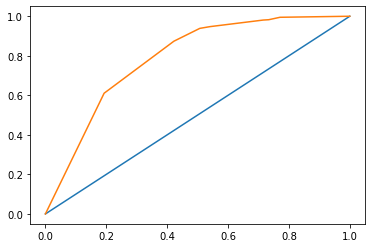

In [455]:
y_pred = clf_gini.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [457]:
from sklearn.metrics import roc_auc_score


In [458]:
print('ROC AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.78936


In [460]:
from sklearn.model_selection import cross_val_score

In [462]:
scores = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.77079108 0.75609756 0.77235772 0.76626016 0.78252033 0.7398374
 0.75609756 0.78455285 0.75406504 0.77235772]
Average 10 fold Cross Validation Accuracy for testing data:  0.7654937416514124


In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_gini,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7716


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=5, random_state=50)
GridSearch CV score on test set: 0.7796


In [466]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=50)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=50)

In [467]:
train_en_predictions = clf_en.predict(X_train)
test_en_predictions = clf_en.predict(X_test)
print('Training Accuracy: ' ,accuracy_score(y_train, train_en_predictions))
print('Testing Accuracy: ' ,accuracy_score(y_test, test_en_predictions))

Training Accuracy:  0.7764681975208291
Testing Accuracy:  0.7796208530805687


[Text(373.55, 398.64, 'X[4] <= 0.5\nentropy = 0.833\nsamples = 4921\nvalue = [3622, 1299]'),
 Text(198.4, 326.15999999999997, 'X[3] <= 0.5\nentropy = 0.923\nsamples = 3742\nvalue = [2475, 1267]'),
 Text(99.2, 253.67999999999998, 'X[8] <= 0.5\nentropy = 0.983\nsamples = 2727\nvalue = [1570, 1157]'),
 Text(49.6, 181.2, 'X[9] <= 0.5\nentropy = 0.85\nsamples = 1244\nvalue = [901, 343]'),
 Text(24.8, 108.71999999999997, 'X[12] <= 0.5\nentropy = 0.914\nsamples = 849\nvalue = [570, 279]'),
 Text(12.4, 36.23999999999995, 'entropy = 0.963\nsamples = 593\nvalue = [363, 230]'),
 Text(37.2, 36.23999999999995, 'entropy = 0.704\nsamples = 256\nvalue = [207, 49]'),
 Text(74.4, 108.71999999999997, 'X[1] <= 0.5\nentropy = 0.639\nsamples = 395\nvalue = [331, 64]'),
 Text(62.0, 36.23999999999995, 'entropy = 0.624\nsamples = 385\nvalue = [325, 60]'),
 Text(86.8, 36.23999999999995, 'entropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(148.8, 181.2, 'X[11] <= 0.5\nentropy = 0.993\nsamples = 1483\nvalue = 

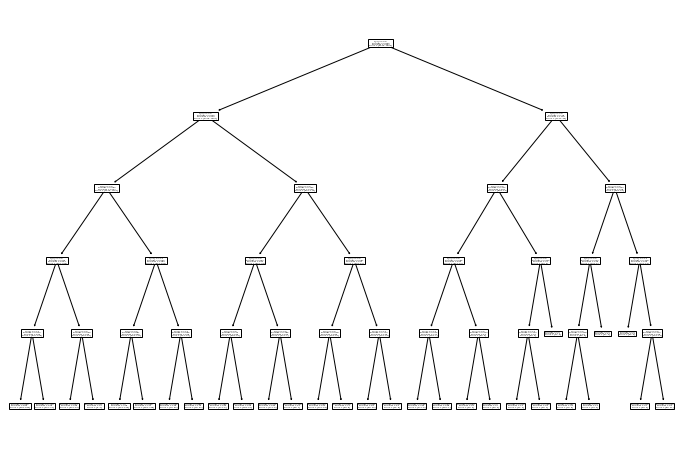

In [468]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [469]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_en_predictions)
cm

array([[1417,  123],
       [ 342,  228]], dtype=int64)

<AxesSubplot:>

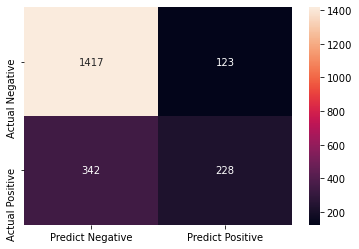

In [470]:
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [471]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, test_en_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1645
False Positives: 123
False Negatives: 342
Accuracy: 0.7796208530805687
Precision: 0.6495726495726496
Sensitivity: 0.4
Specificity: 0.9201298701298701
F1: 0.495114006514658


In [472]:
print(classification_report(y_test, test_en_predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1540
           1       0.65      0.40      0.50       570

    accuracy                           0.78      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.76      0.78      0.76      2110



<AxesSubplot:>

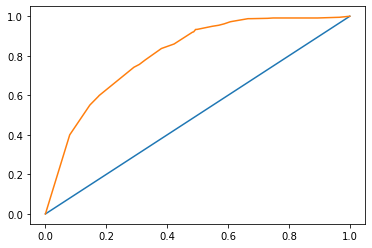

In [473]:
y_pred = clf_en.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [474]:
print('ROC AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.80816


In [476]:
cores = cross_val_score(clf_en, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.77079108 0.75609756 0.77235772 0.76626016 0.78252033 0.7398374
 0.75609756 0.78455285 0.75406504 0.77235772]
Average 10 fold Cross Validation Accuracy for testing data:  0.7654937416514124


In [478]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_en,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7716


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=50)
GridSearch CV score on test set: 0.7796


RESULT:-
Correct Predictions: 1645
False Positives: 123
False Negatives: 342
     precision    recall  f1-score   support

           0       0.81      0.92      0.86      1540
           1       0.65      0.40      0.50       570

    accuracy                           0.78      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.76      0.78      0.76      2110
ROC AUC: 0.80816
    


RANDOM FOREST

In [480]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state= 50, max_depth=3, criterion='gini')
rfc.fit(X_train, y_train )

RandomForestClassifier(max_depth=3, random_state=50)

In [482]:
y_pred_forest_train = rfc.predict(X_train)
y_pred_forest_test = rfc.predict(X_test)

In [483]:
print('Training accuracy: ', accuracy_score(y_train, y_pred_forest_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_forest_test))

Training accuracy:  0.7640723430197114
Testing accuracy:  0.7507109004739336


In [484]:
print(classification_report(y_test, y_pred_forest_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1540
           1       0.65      0.16      0.26       570

    accuracy                           0.75      2110
   macro avg       0.71      0.57      0.56      2110
weighted avg       0.73      0.75      0.69      2110



<AxesSubplot:>

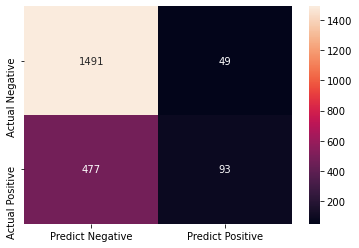

In [485]:
cm = confusion_matrix(y_test, y_pred_forest_test )
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [486]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, test_gini_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1584
False Positives: 49
False Negatives: 477
Accuracy: 0.7540284360189573
Precision: 0.6549295774647887
Sensitivity: 0.1631578947368421
Specificity: 0.9681818181818181
F1: 0.26123595505617975


<AxesSubplot:>

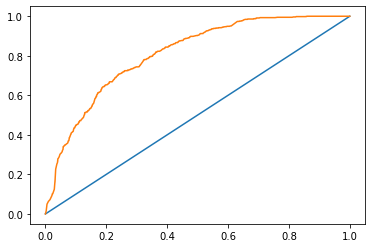

In [488]:
y_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [489]:
print('ROC AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.80924


In [491]:
scores = cross_val_score(rfc, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.77281947 0.75813008 0.75406504 0.74186992 0.76422764 0.75609756
 0.7703252  0.75406504 0.77845528 0.76829268]
Average 10 fold Cross Validation Accuracy for testing data:  0.7618347927901186


In [493]:
parameters = [{'max_depth':[3,4,5]}, {'criterion': ['gini','entrophy']}]



grid_search = GridSearchCV(estimator = rfc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7789


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=5, random_state=50)
GridSearch CV score on test set: 0.7815


RESULTS-
Correct Predictions: 1584
False Positives: 49
False Negatives: 477
ROC AUC: 0.80924
     precision    recall  f1-score   support

           0       0.76      0.97      0.85      1540
           1       0.65      0.16      0.26       570

    accuracy                           0.75      2110
   macro avg       0.71      0.57      0.56      2110
weighted avg       0.73      0.75      0.69      2110
Training accuracy:  0.7640723430197114
Testing accuracy:  0.7507109004739336


XGBOOST

In [497]:
import sys
!{sys.executable} -m pip install xgboost

In [499]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[15:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [500]:
y_pred_xgb_train = xgb_clf.predict(X_train)
y_pred_xgb_test = xgb_clf.predict(X_test)
print('Training accuracy: ', accuracy_score(y_train, y_pred_xgb_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_xgb_test))

Training accuracy:  0.7943507417191628
Testing accuracy:  0.7781990521327015


In [501]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1540
           1       0.61      0.49      0.55       570

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<AxesSubplot:>

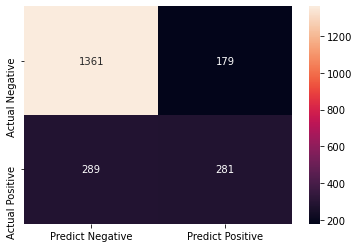

In [502]:
cm = confusion_matrix(y_test, y_pred_xgb_test )
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [503]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, y_pred_xgb_test ))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1642
False Positives: 179
False Negatives: 289
Accuracy: 0.7781990521327015
Precision: 0.6108695652173913
Sensitivity: 0.49298245614035086
Specificity: 0.8837662337662338
F1: 0.5456310679611651


<AxesSubplot:>

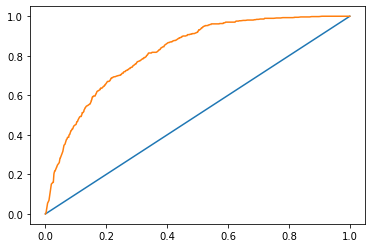

In [504]:
y_pred = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [505]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8179


In [507]:
scores = cross_val_score(xgb_clf, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

[15:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [508]:
parameters = [{'max_depth':[3,4,5,6,7]}]



grid_search = GridSearchCV(estimator = xgb_clf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

[15:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RESULTS-
Training accuracy:  0.7943507417191628
Testing accuracy:  0.7781990521327015
      precision    recall  f1-score   support

           0       0.82      0.88      0.85      1540
           1       0.61      0.49      0.55       570

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110
Correct Predictions: 1642
False Positives: 179
False Negatives: 289
    ROC AUC: 0.8179

# Parameter tunning

In [39]:

    params = {
            'colsample_bytree':[0.3,0.4,0.5,0.7],
            'max_depth': [3,4,5,6,8,10,12,15],
            
            'gamma': [0.0,0.1,0.2,0.3,0.4],
            'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
            'min_child_weight':[1,3,5,7,9,11]
        }         
           
    


In [41]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [42]:
classifier=xgboost.XGBClassifier()

In [43]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [44]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.5s finished


[00:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
random_search.best_params_

{'min_child_weight': 9,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [50]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=9,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[00:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [52]:
score

array([0.80397727, 0.81365576, 0.80369844, 0.81365576, 0.79658606,
       0.78093883, 0.82930299, 0.79800853, 0.79658606, 0.81365576])

In [53]:
score.mean()

0.8050065466183887

In [92]:
telecom2 = telecom.copy()

In [93]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Performing grid search
%matplotlib inline



# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':1000,
            "eval_metric"      : ['logloss']
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

In [96]:
from sklearn.metrics import accuracy_score
xgb_clf.fit(X_train, y_train)
y_pred_xgb_train = xgb_clf.predict(X_train)
y_pred_xgb_test = xgb_clf.predict(X_test)
print('Accuracy train : ', accuracy_score(y_train, y_pred_xgb_train))
print('Accuracy test : ', accuracy_score(y_test, y_pred_xgb_test))

Accuracy train :  0.8221906116642959
Accuracy test :  0.7990521327014218


<AxesSubplot:>

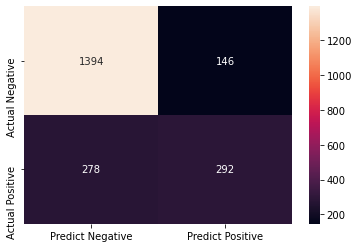

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb_test)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [99]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, y_pred_xgb_test ))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)

Correct Predictions: 1686
False Positives: 146
False Negatives: 278
Accuracy: 0.7990521327014218
Precision: 0.6666666666666666
Sensitivity: 0.512280701754386
Specificity: 0.9051948051948052
F1: 0.5793650793650793


<AxesSubplot:>

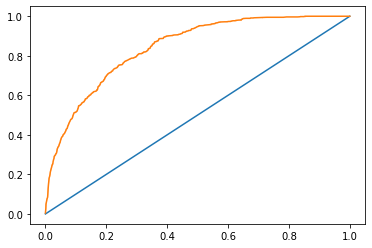

In [100]:
from sklearn.metrics import roc_curve
y_pred = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [101]:
from sklearn.metrics import roc_auc_score
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8414


In [103]:
y_pred_train = xgb_clf.predict_proba(X_train)[:,1]
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))

ROC AUC: 0.8683


In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_clf, X_train, y_train, cv = 5, scoring='roc_auc')
print('Average 5 fold Cross Validation roc_auc for testing data: ', scores.mean())

Average 5 fold Cross Validation roc_auc for testing data:  0.8406766511369103


In [105]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    importance = alg.feature_importances_.argsort()
    importance = importance[::-1] # reversing the list  descending order
    feat_imp=pd.DataFrame({
    'cols':dtrain.columns[importance],
    'imps':alg.feature_importances_[importance]
})
# plot feature importance
    plt.figure(figsize = (50,20))
    sns.barplot(x = 'cols', y = 'imps', data = feat_imp)
    plt.xticks(rotation=90)


Model Report
Accuracy : 0.8161
AUC Score (Train): 0.865470


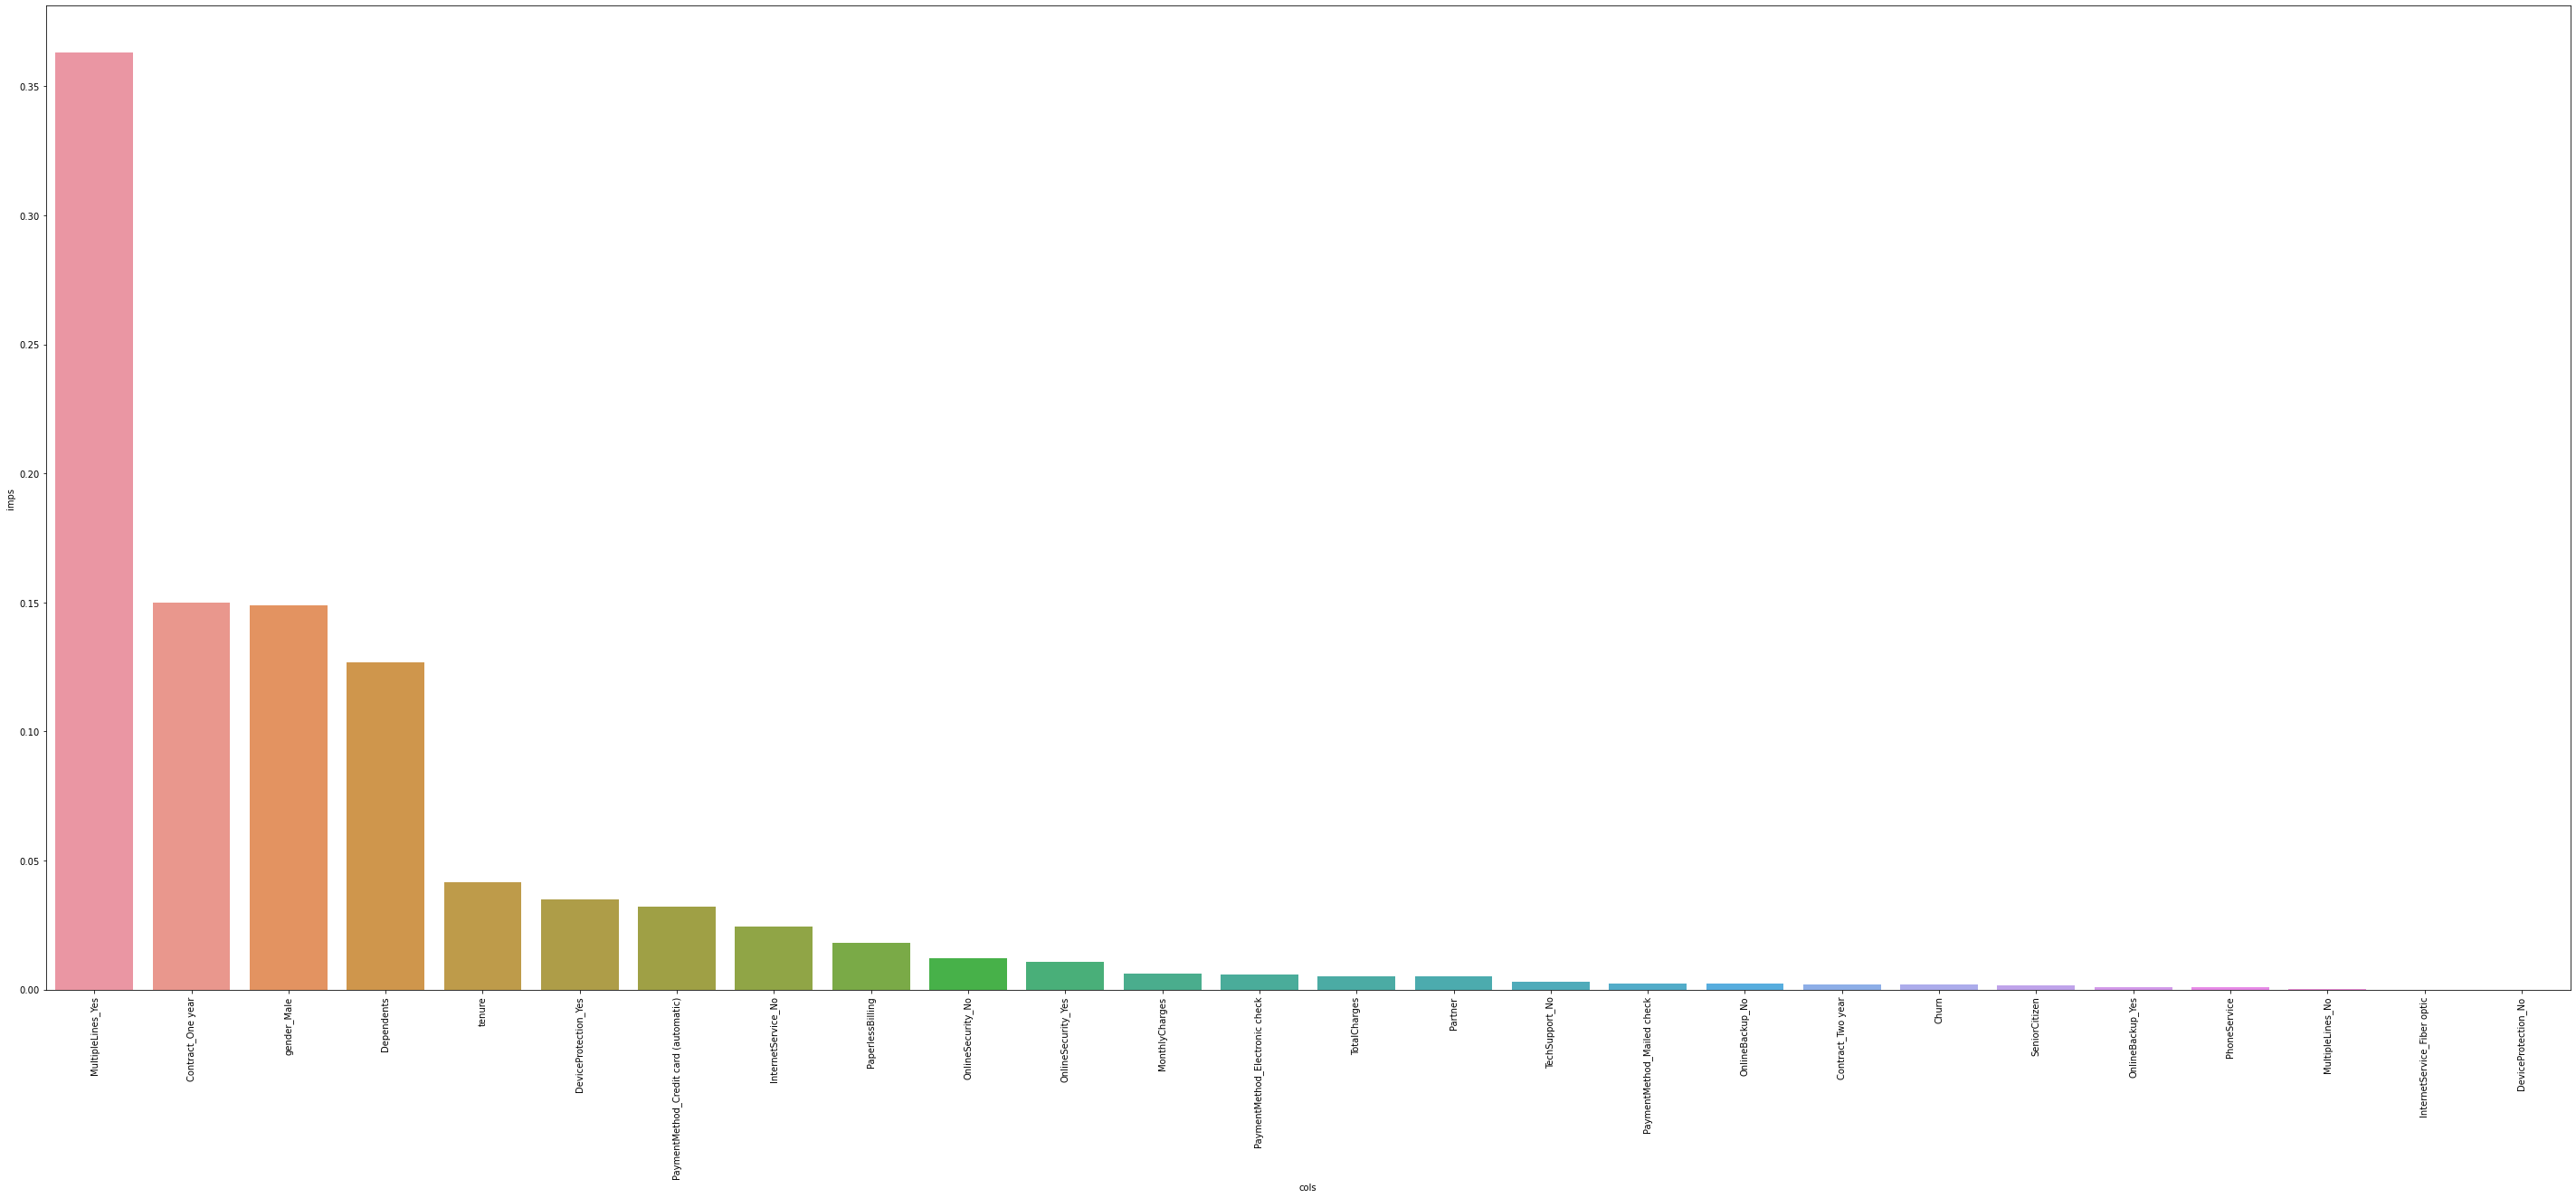

In [107]:
lst = [x for x in telecom2.columns if x not in ['Churn']]
target = 'Churn'
modelfit(xgb_clf, telecom2, lst, target)

In [108]:
from sklearn.model_selection import GridSearchCV
def bestvalues(model, x, parameters, y ,cvrounds = 5, scoring = 'roc_auc'):
    grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = scoring,
                           cv = cvrounds,
                           verbose=0)
    
    grid_search.fit(x,y)
    # best score achieved during the GridSearchCV
    print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
    print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
    print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
    return grid_search.best_estimator_

In [110]:
parameters = {'learning_rate':[x/100 for x in range(45,55)],
             'max_depth':[3,4,6,7,9], 'min_child_weight': range(1,10,2)
             }
xgb_tuned = bestvalues(xgb_clf, X_train, parameters, y_train)

GridSearch CV best score : 0.8480


Parameters that give the best results : 

 {'learning_rate': 0.51, 'max_depth': 3, 'min_child_weight': 9}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.51, max_delta_step=0,
              max_depth=3, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [112]:
y_pred_train = xgb_tuned.predict_proba(X_train)[:,1]
y_pred = xgb_tuned.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8669
ROC AUC test: 0.8432


In [113]:
parameters = {'gamma':[i/100.0 for i in range(0,10)],
             'subsample':[i/10.0 for i in range(1,10)],
             'colsample_bytree':[i/10.0 for i in range(1,10)]}
xgb_tuned = bestvalues(xgb_tuned, X_train, parameters, y_train)

GridSearch CV best score : 0.8484


Parameters that give the best results : 

 {'colsample_bytree': 0.4, 'gamma': 0.08, 'subsample': 0.8}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric=['logloss'],
              gamma=0.08, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.51, max_delta_step=0,
              max_depth=3, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [114]:
y_pred_train = xgb_tuned.predict_proba(X_train)[:,1]
y_pred = xgb_tuned.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8625
ROC AUC test: 0.8423


In [115]:
parameters = {'reg_alpha':[8,9,10,11],
             'reg_lambda':[x/10 for x in range(15,35)]}
xgb_tuned = bestvalues(xgb_tuned, X_train, parameters, y_train)

GridSearch CV best score : 0.8485


Parameters that give the best results : 

 {'reg_alpha': 9, 'reg_lambda': 1.8}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric=['logloss'],
              gamma=0.08, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.51, max_delta_step=0,
              max_depth=3, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=9, reg_lambda=1.8,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [116]:
y_pred_train = xgb_tuned.predict_proba(X_train)[:,1]
y_pred = xgb_tuned.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8628
ROC AUC test: 0.8426



Model Report
Accuracy : 0.8143
AUC Score (Train): 0.859865


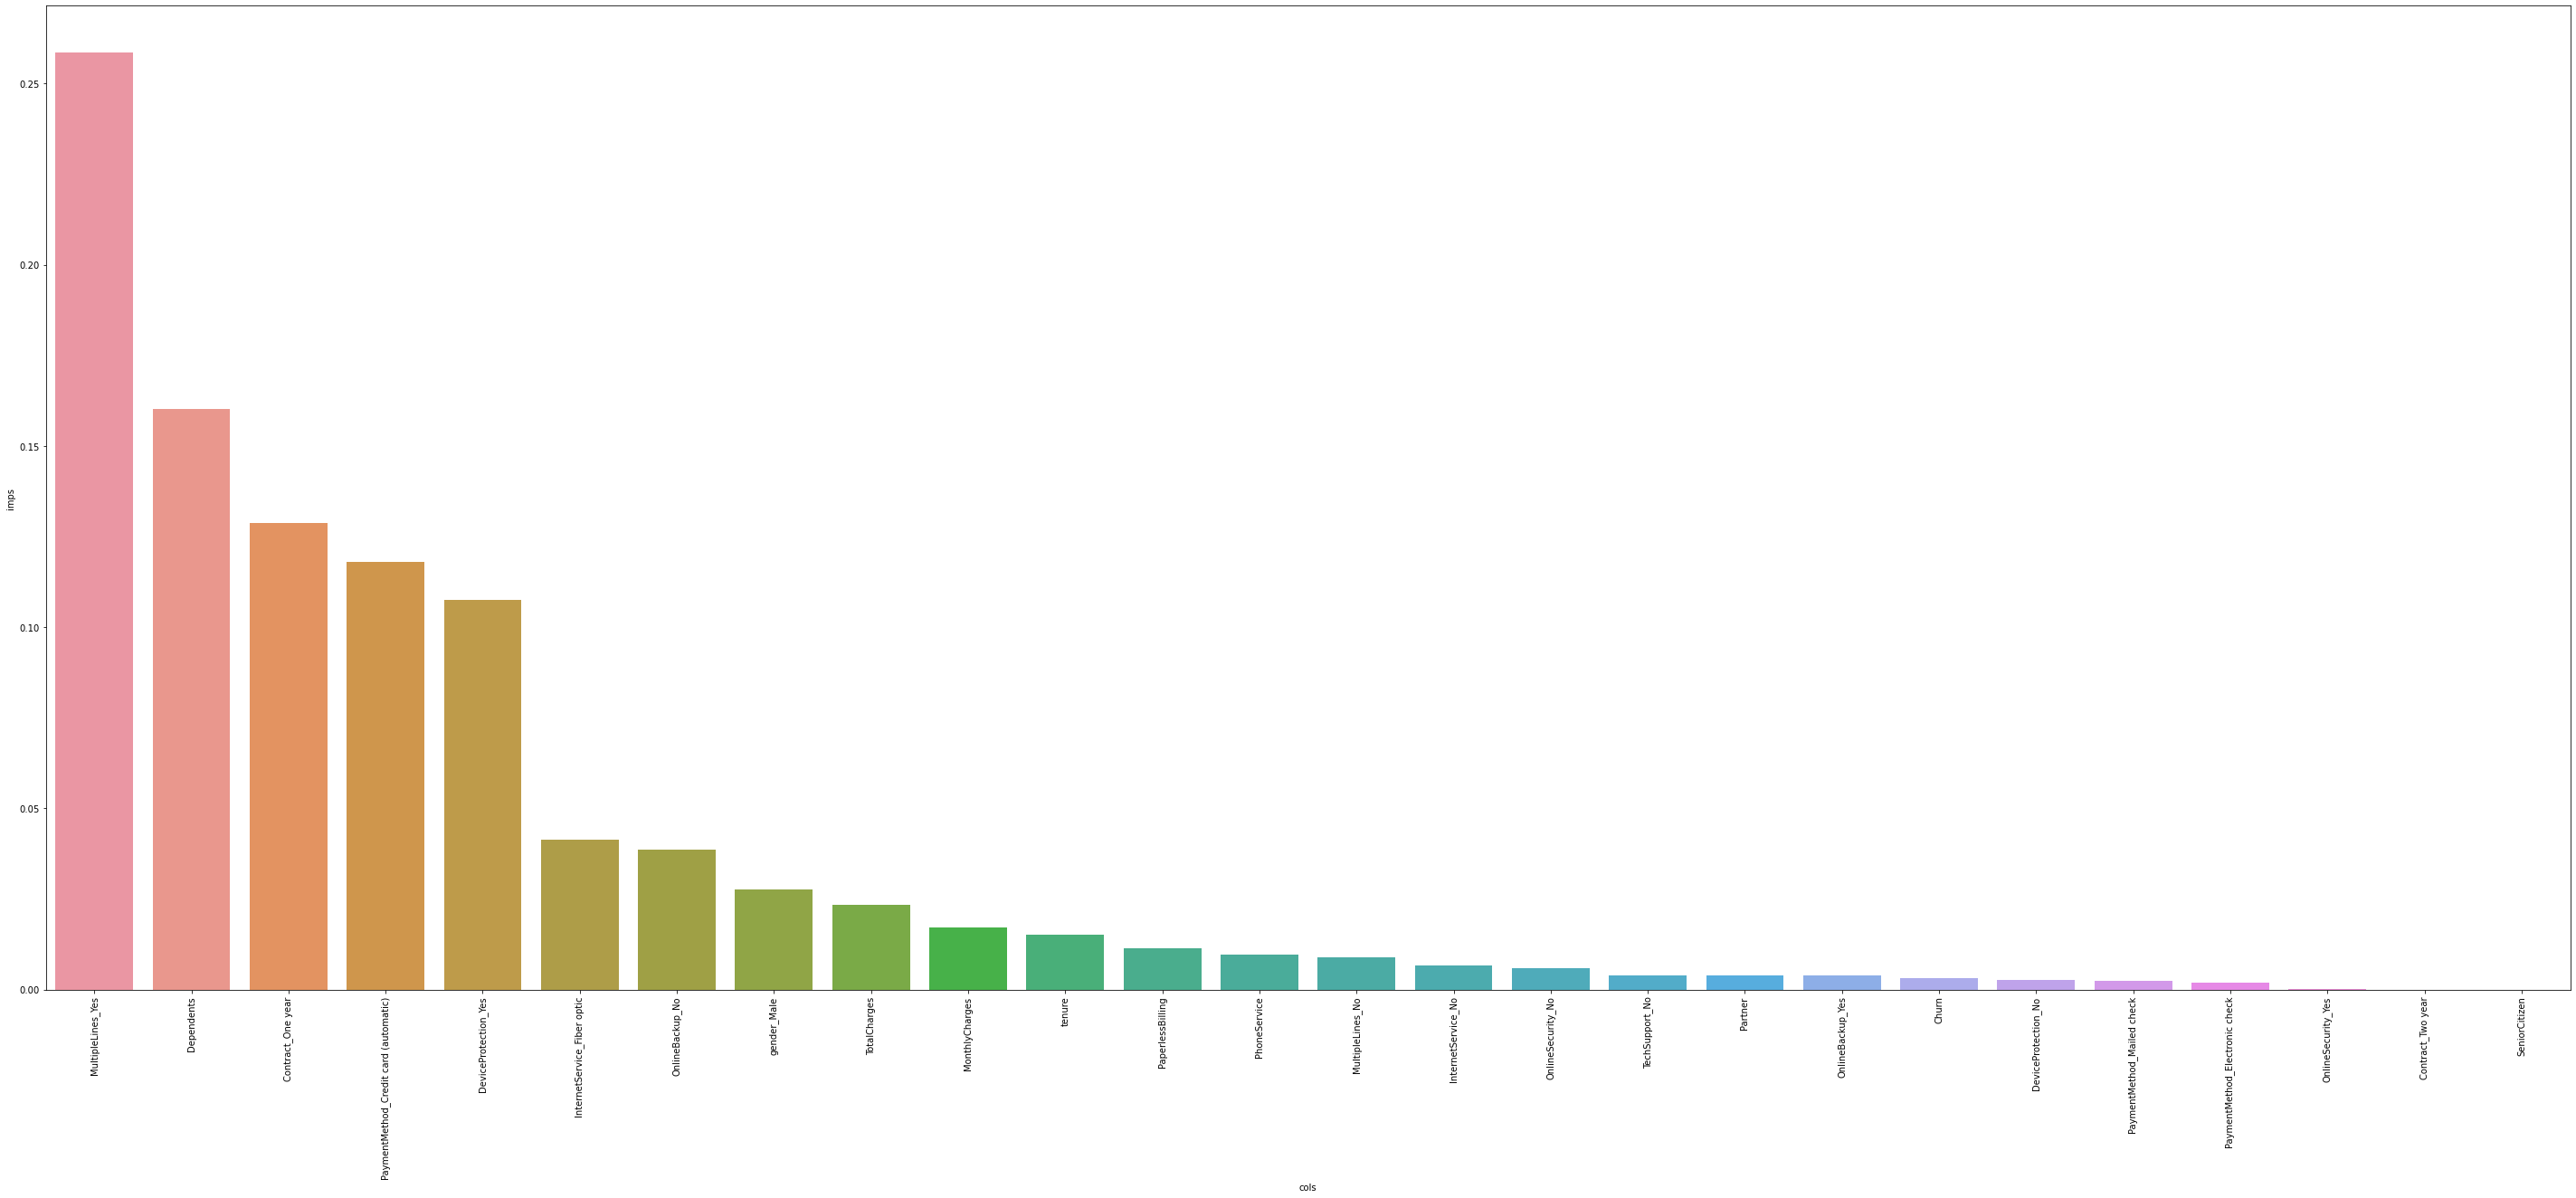

In [117]:
lst = [x for x in telecom2.columns if x not in ['Churn']]
target = 'Churn'
modelfit(xgb_tuned, telecom2, lst, target)